In [48]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Dropout,Conv2D, Flatten
from tensorflow.keras.models import Model, Sequential

In [49]:
#load dataset
image_set = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = image_set.load_data()
x_train , x_test = x_train/255.0 , x_test/255.0
print("shape of x_train: ",x_train.shape)
print("shape of y_train: ",y_train.shape)
print("shape of x_test: ",x_test.shape)
print("shape of y_test: ",y_test.shape)


shape of x_train:  (60000, 28, 28)
shape of y_train:  (60000,)
shape of x_test:  (10000, 28, 28)
shape of y_test:  (10000,)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


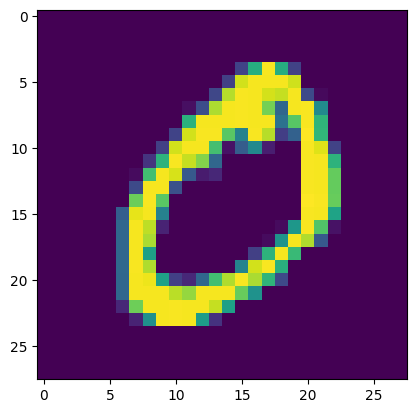

In [50]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)
print(x_test.shape)
plt.imshow(x_train[1])

In [51]:
#number of classes
n= len(set(y_train))
print("number of classes:",n)

number of classes: 10


In [52]:
#model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(n, activation='softmax')(x)

model = Model(i, x)

In [53]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [55]:
#train the model
r = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0691 - accuracy: 0.9784 - val_loss: 0.0412 - val_accuracy: 0.9866
Epoch 2/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.0421 - val_accuracy: 0.9867
Epoch 3/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0407 - accuracy: 0.9873 - val_loss: 0.0387 - val_accuracy: 0.9869
Epoch 4/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0326 - accuracy: 0.9893 - val_loss: 0.0388 - val_accuracy: 0.9881
Epoch 5/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0445 - val_accuracy: 0.9866
Epoch 6/15
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0345 - val_accuracy: 0.9892
Epoch 7/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0380 -

In [59]:
#evaluate the mode
print("Train score:",model.evaluate(x_train,y_train))
print("Test score:",model.evaluate(x_test,y_test))


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0046 - accuracy: 0.9984
Train score: [0.004621704109013081, 0.9983500242233276]
313/313 [==============================] - 2s 6ms/step - loss: 0.0447 - accuracy: 0.9894
Test score: [0.044726837426424026, 0.9894000291824341]


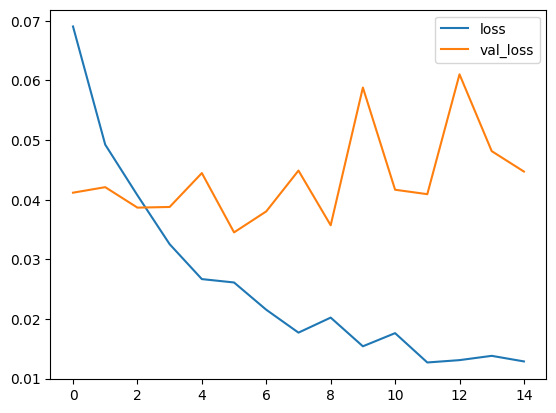

In [56]:
#plot loss
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()


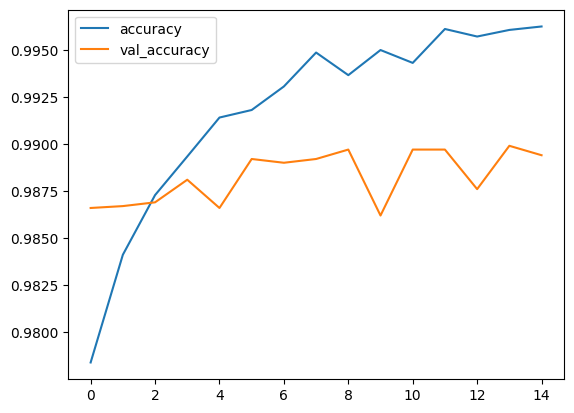

In [57]:
#plot accuracy
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [60]:
#make predictions
P = model.predict(x_test)
predictions = np.argmax(P,axis=1)
print(P.shape)
print(predictions.shape)

313/313 [==============================] - 4s 13ms/step
(10000, 10)
(10000,)


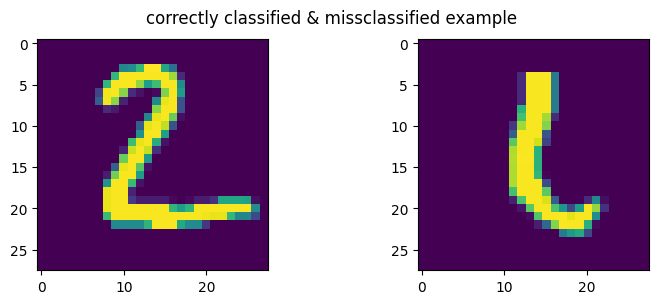

In [78]:
#misclasified examples
misclasified_indices = np.where(predictions != y_test)[0]
example = np.random.choice(misclasified_indices)
plt.figure(figsize=(9,3))
plt.subplot(121)
plt.imshow(x_test[1].reshape(28,28))
plt.subplot(122)
plt.imshow(x_test[example].reshape(28,28))
plt.suptitle('correctly classified & missclassified example')
plt.show()

313/313 [==============================] - 3s 9ms/step
Confusion matrix, without normalisation
[[ 973    1    0    0    1    0    1    1    1    2]
 [   1 1133    0    0    0    0    0    1    0    0]
 [   0    1 1023    1    0    0    0    4    3    0]
 [   0    0    3 1000    0    2    0    2    3    0]
 [   0    0    0    0  974    0    3    0    0    5]
 [   1    0    0   11    0  871    1    3    3    2]
 [   4    2    1    0    2    0  945    0    3    1]
 [   0    2    5    0    0    0    0 1018    1    2]
 [   2    0    1    0    0    0    0    0  968    3]
 [   0    0    0    1    9    5    0    4    1  989]]


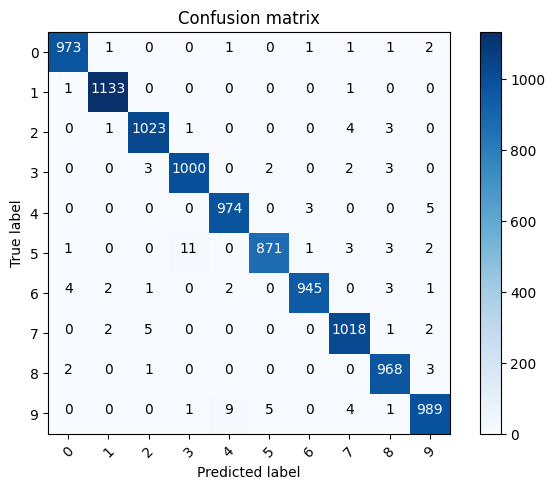

In [79]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix, without normalisation")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
        horizontalalignment='center',
        color="white" if cm[i, j] > thresh else "black")




p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()